Going through experimental data collected in lab using different material substrates and coatings 
 used for soft neural interface device
with Ben Rees

--------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gray = '#758A93'
cream = '#ECD5BC'
yellow = '#E9B63B'
red = '#C66E52'

In [2]:
# kirigami width at 4 points 
a, L, w = 2.995, 4.28, 0.85
point_1 = 20 - 3*w
point_2 = 20 - 5*a
point_3 = 20 - 2*w
point_4 = 20 - 4*a
kirigami_w = (point_1 + point_2 + point_3 + point_4) / 4

In [3]:
# all mm
polyimide_li = 19.00
polyimide_w = 5.18
polyimide_t = 15e-3

kirigami_li = 23.79
# kirigami_w = 5  # NO GUESS WE CALCUALTE IT WITH SCIENCE
kirigami_t = 25.4e-3

pdms_li = 22.38
pdms_w = 5.6
pdms_t = 1024.5e-3

kirigami_lf = 4838e-3
polyimide_lf = 53.8e-3
pdms_lf = 3588.7e-3

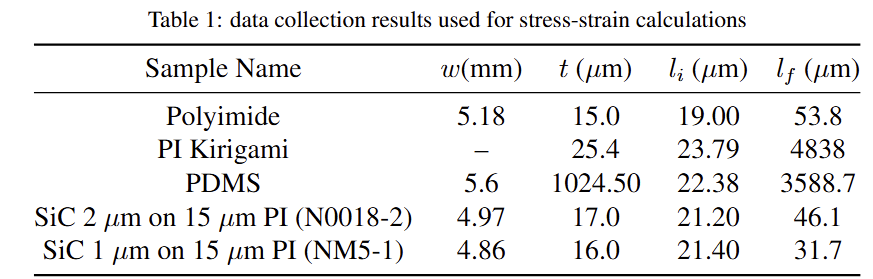

1. Test bulk substrates (PI, silicone, kirigami PI). Plot engineering stress–strain curves to failure at a
fixed displacement rate and compare mechanical properties. Include elongation limit, elastic modulus,
tensile strength, and toughness.

$\epsilon = \frac{\Delta L}{L_0} = \frac{extension - original}{original}$


$\sigma = \frac{F}{A_0} = \frac{force}{original cross-sectional area}$

In [4]:
kirigami_data = pd.read_excel('data/kirigami.xlsx', sheet_name='cleaned')
polyimide_data = pd.read_excel('data/polyimide.xlsx', sheet_name='cleaned')
pdms_data = pd.read_excel('data/PDMS.xlsx', sheet_name='cleaned')

In [5]:
kirigami_data['strain'] = (kirigami_data['extension']) / kirigami_li
kirigami_data['stress'] = kirigami_data['force'] / (kirigami_w * kirigami_t)

polyimide_data['strain'] = (polyimide_data['extension']) / polyimide_li
polyimide_data['stress'] = polyimide_data['force'] / (polyimide_w * polyimide_t)

pdms_data['strain'] = (pdms_data['extension']) / pdms_li
pdms_data['stress'] = pdms_data['force'] / (pdms_w * pdms_t)

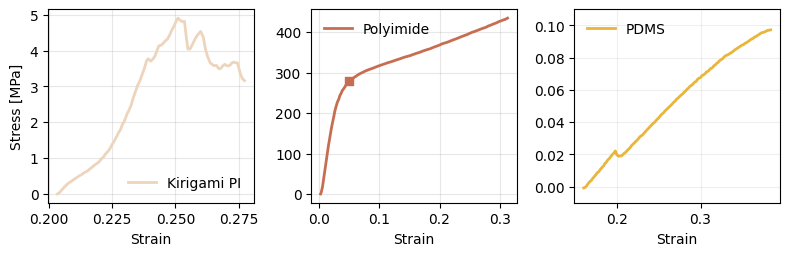

In [6]:
# plot stress vs strain, all three
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8/3))

ax1.plot(kirigami_data['strain'][:-150], kirigami_data['stress'][:-150],
          color = cream, linewidth=2, label='Kirigami PI')
ax1.set_xlabel('Strain')
ax1.set_ylabel('Stress [MPa]')
ax1.grid(True, alpha=0.3)
ax1.legend(frameon=False)

ax2.plot(polyimide_data['strain'][:-30], polyimide_data['stress'][:-30],
          color = red, linewidth=2, label='Polyimide')
ax2.set_xlabel('Strain')
ax2.grid(True, alpha=0.3)
ax2.scatter([0.05], [280], color = red, marker='s') # to mark yield point
ax2.legend(frameon=False)

ax3.plot(pdms_data['strain'][:-65], pdms_data['stress'][:-65],
          color = yellow, linewidth=2, label='PDMS')
ax3.set_xlabel('Strain')
ax3.set_ylim(-0.01, 0.11)
ax3.grid(True, alpha=0.2)
ax3.legend(frameon=False)
plt.tight_layout()
# fig.savefig('figs/stress_strain.pdf', dpi=300)


modulus of elasticity, toughness, tensile strength, elongation at break

In [7]:
pdms_strain_limit = 0.35
kirigimi_strain_limit = 0.25
polyimide_strain_limit = 0.05

pdms_linear_mask = pdms_data['strain'] <= pdms_strain_limit
pdms_slope, _ = np.polyfit(pdms_data['strain'][pdms_linear_mask], pdms_data['stress'][pdms_linear_mask], 1)
pdms_modulus = pdms_slope

kirigami_linear_mask = kirigami_data['strain'] <= kirigimi_strain_limit
kirigami_slope, _ = np.polyfit(kirigami_data['strain'][kirigami_linear_mask], kirigami_data['stress'][kirigami_linear_mask], 1)
kirigami_modulus = kirigami_slope

polyimide_linear_mask = polyimide_data['strain'] <= polyimide_strain_limit
polyimide_slope, _ = np.polyfit(polyimide_data['strain'][polyimide_linear_mask], polyimide_data['stress'][polyimide_linear_mask], 1)
polyimide_modulus = polyimide_slope

In [8]:
pdms_tensile_strength = pdms_data['stress'].max()
kirigami_tensile_strength = kirigami_data['stress'].max()
polyimide_tensile_strength = polyimide_data['stress'].max()

# the area under the stress-strain curve
pdms_toughness = np.trapezoid(pdms_data['stress'], x=pdms_data['strain'])
kirigami_toughness = np.trapezoid(kirigami_data['stress'], x=kirigami_data['strain'])
polyimide_toughness = np.trapezoid(polyimide_data['stress'], x=polyimide_data['strain'])

pdms_elongation_limit = pdms_data['strain'].max() * 100
kirigami_elongation_limit = kirigami_data['strain'].max() * 100
polyimide_elongation_limit = polyimide_data['strain'].max() * 100

print(f'PDMS Modulus: {pdms_modulus:.2f} MPa')
print(f'Kirigami PI Modulus: {kirigami_modulus:.2f} MPa')
print(f'Polyimide Modulus: {polyimide_modulus:.2f} MPa')
print()
print("Elongation Limit at Break")
print(f"PDMS: {pdms_elongation_limit:.1f}%")
print(f"Kirigami PI: {kirigami_elongation_limit:.1f}%")
print(f"Polyimide: {polyimide_elongation_limit:.1f}%")
print()
print("Tensile Strength")
print(f"PDMS: {pdms_tensile_strength:.3f} MPa")
print(f"Kirigami PI: {kirigami_tensile_strength:.2f} MPa")
print(f"Polyimide: {polyimide_tensile_strength:.2f} MPa")
print()
print("Toughness (Energy to Break)")
print(f"PDMS: {pdms_toughness:.3f} MJ/m^3")
print(f"Kirigami PI: {kirigami_toughness:.3f} MJ/m^3")
print(f"Polyimide: {polyimide_toughness:.3f} MJ/m^3")

PDMS Modulus: 0.48 MPa
Kirigami PI Modulus: 108.38 MPa
Polyimide Modulus: 6324.00 MPa

Elongation Limit at Break
PDMS: 50.0%
Kirigami PI: 40.3%
Polyimide: 37.6%

Tensile Strength
PDMS: 0.097 MPa
Kirigami PI: 4.91 MPa
Polyimide: 456.18 MPa

Toughness (Energy to Break)
PDMS: 0.012 MJ/m^3
Kirigami PI: 0.235 MJ/m^3
Polyimide: 119.592 MJ/m^3


2. Test bilayer films (SiC on PI). Compare the stress–strain behavior to that of the bulk PI substrate. Estimate the coating (SiC) modulus and compare it with literature values for the encapsulation material. If errors occur in extracting the coating modulus, briefly explain likely causes.

In [9]:
SiC_1um = pd.read_excel('data/SiC/1um.xlsx', sheet_name='cleaned')
SiC_2um = pd.read_excel('data/SiC/2um.xlsx', sheet_name='cleaned')
# given dimensions in mm
SiC_2um_w = 4.86
SiC_2um_t = 17e-3
SiC_2um_li = 22.2
SiC_2um_lf = 46.1e-3

SiC_1um_w = 4.86
SiC_1um_t = 16e-3
SiC_1um_li = 21.4
SiC_1um_lf = 31.7e-3

In [10]:
SiC_1um['strain'] = (SiC_1um['extension']) / SiC_1um_li
SiC_1um['stress'] = SiC_1um['force'] / (SiC_1um_w * SiC_1um_t)
SiC_2um['strain'] = (SiC_2um['extension']) / SiC_2um_li
SiC_2um['stress'] = SiC_2um['force'] / (SiC_2um_w * SiC_2um_t)

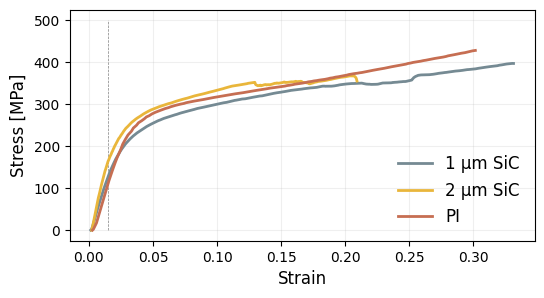

In [11]:
end = -35
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(SiC_1um['strain'][:end], SiC_1um['stress'][:end],
          color = gray, linewidth=2, label='1 µm SiC')
ax.plot(SiC_2um['strain'][:end], SiC_2um['stress'][:end],
          color = yellow, linewidth=2, label='2 µm SiC')
ax.plot(polyimide_data['strain'][:end], polyimide_data['stress'][:end],
          color = red, linewidth=2, label='PI')
ax.set_xlabel('Strain', fontsize=12)
ax.set_ylabel('Stress [MPa]', fontsize=12)
ax.grid(True, alpha=0.2)
ax.plot([0.015, 0.015], [0, 500], color='black', linestyle = '--', alpha = 0.5, linewidth = 0.5, zorder=-1)  # yield point
ax.legend(frameon=False, ncols=1, fontsize=12)
# fig.savefig('figs/sic_stress_strain.pdf', dpi=300, bbox_inches='tight')

modulus calculation

In [12]:
PI_strain_limit = 0.015
PI_linear_mask = polyimide_data['strain'] <= PI_strain_limit
PI_slope, _ = np.polyfit(polyimide_data['strain'][PI_linear_mask], polyimide_data['stress'][PI_linear_mask], 1)

SiC_1um_linear_mask = SiC_1um['strain'] <= PI_strain_limit
SiC_1um_slope, _ = np.polyfit(SiC_1um['strain'][SiC_1um_linear_mask], SiC_1um['stress'][SiC_1um_linear_mask], 1)

SiC_2um_linear_mask = SiC_2um['strain'] <= PI_strain_limit
SiC_2um_slope, _ = np.polyfit(SiC_2um['strain'][SiC_2um_linear_mask], SiC_2um['stress'][SiC_2um_linear_mask], 1)

print(f'PI Modulus: {PI_slope:.2f} MPa')
print(f'1 µm SiC Modulus: {SiC_1um_slope:.2f} MPa')
print(f'2 µm SiC Modulus: {SiC_2um_slope:.2f} MPa')

PI Modulus: 9242.68 MPa
1 µm SiC Modulus: 9857.53 MPa
2 µm SiC Modulus: 13110.89 MPa


estimating the controbution of the coating using the rule of mixtures for composite materials:

$E_{coating} = \frac{E_{composite}t_{total} - E_{substrate}t_{substrate}}{t_{coating}}$

In [13]:
E_substrate = PI_slope 

# coating thicknesses mm
t_coating_1um = 1e-3 
t_coating_2um = 2e-3 

E_composite_1um = SiC_1um_slope
t_total_1um = SiC_1um_t
t_substrate_1um = t_total_1um - t_coating_1um # 15e-3 given

E_coating_1um = (E_composite_1um * t_total_1um - E_substrate * t_substrate_1um) / t_coating_1um

E_composite_2um = SiC_2um_slope
t_total_2um = SiC_2um_t
t_substrate_2um = t_total_2um - t_coating_2um # 15e-3 given #same thing

E_coating_2um = (E_composite_2um * t_total_2um - E_substrate * t_substrate_2um) / t_coating_2um

print(f"Estimated SiC Modulus (from 1µm sample): {E_coating_1um / 1000:.2f} GPa")
print(f"Estimated SiC Modulus (from 2µm sample): {E_coating_2um / 1000:.2f} GPa")

Estimated SiC Modulus (from 1µm sample): 19.08 GPa
Estimated SiC Modulus (from 2µm sample): 42.12 GPa


3. Cracking analysis from recordings (SiC on PI): Include image arrays from the recording files at 0% strain and Stages I, II, III. Calculate and report crack-onset strain, εc, critical energy release rate, Gc, crack density at saturation CDsat, critical stress-transfer length lc, and interfacial shear strength (IFSS). Compare the adhesion level with other film-substrate interface materials.

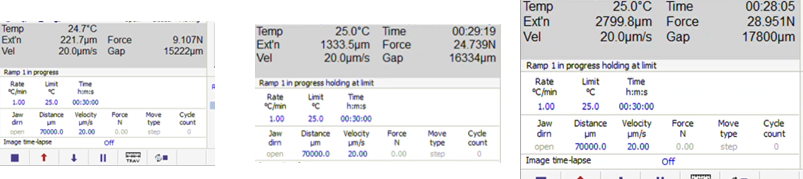

for reference on Stage I II and III

In [14]:
# stage 1 11 111 strain values
ext_stage_1 = 221.7e-3 #mm
eps_1 = ext_stage_1 / SiC_2um_li
ext_stage_2 = 1333.5e-3 #mm
eps_2 = ext_stage_2 / SiC_2um_li
ext_3 = 2799.8e-3 #mm
eps_3 = ext_3 / SiC_2um_li
print("stage 1: ", eps_1*100, "%", "stage 2: ", eps_2*100, "%", "stage 3: ", eps_3*100, "%")

stage 1:  0.9986486486486488 % stage 2:  6.006756756756756 % stage 3:  12.611711711711711 %


In [15]:
objective_length = 0.92272 #mm
extension_cracking = 158e-3 #mm
strain_2um = extension_cracking / SiC_2um_li
num_cracks = 15
crack_density_2um = num_cracks / objective_length # cracks/mm
print(f"Crack Density for 2 µm film at saturation: {crack_density_2um:.2f} cracks/mm")
print("crack onset strain for 2 µm film at saturation:", strain_2um*100, "%")

Crack Density for 2 µm film at saturation: 16.26 cracks/mm
crack onset strain for 2 µm film at saturation: 0.7117117117117118 %


1 $\mu m$ SiC on PI samples
|thickness (nm)|crack-onset strain εc (%)|crack density at saturation(cracks/mm)|
|---------|-------------------------|---------------------------------------------|
500       |0.896528                 |90.259                                       |
1000      |0.600156               |38.038                                       |
2000      |0.7172                |16.25   |

Cracking Analysis Equations

#### 1. Critical Stress-Transfer Length ($l_c$)
This is the minimum length of a film segment required to build up enough stress to create a new crack. It is calculated directly from the crack density at saturation.

$l_c = \frac{1}{2 \cdot CD_{sat}}$
---

#### 2. Interfacial Shear Strength (IFSS or $\tau$)
This value represents the adhesion strength of the interface between the SiC coating and the PI substrate. A higher value indicates better adhesion.

$\tau = \frac{E_{coating} \cdot \epsilon_c \cdot t_{coating}}{l_c}$
---

#### 3. Critical Energy Release Rate ($G_c$)
This is the amount of strain energy released per unit area as a crack forms. It is a measure of the fracture toughness of the coating.

$G_c = \frac{E_{coating} \cdot \epsilon_c^2 \cdot t_{coating}}{2}$
*   **$\sigma_f$**: Stress in the film at the point of fracture in (MPa).

In [16]:

E_coating = (E_coating_2um) # Mpa
# E_coating = 435000 # MPa true value from lit

print("--- Analysis for 2000 nm (2µm) Film ---")
t_coating_2um = 2000e-6 
CDsat_2um = 16.25     # cracks/mm video calculated value
ec_2um = 0.5282 / 100 # video calculated value
lc_2um = 1 / (2 * CDsat_2um)
print(f"Critical Stress-Transfer Length (lc): {lc_2um:.4f} mm")
IFSS_2um = (E_coating * ec_2um * t_coating_2um) / lc_2um
print(f"Interfacial Shear Strength (IFSS): {IFSS_2um:.2f} MPa")
sigma_f_2um = E_coating * ec_2um
Gc_2um = (sigma_f_2um**2 * t_coating_2um) / (2 * E_coating)
print(f"Critical Energy Release Rate (Gc): {1000* Gc_2um:.5f} mJ/m^2")
print()

print("--- Analysis for 1000 nm Film ---")
t_coating_1um = 1000e-6 
CDsat_1um = 38.038      # cracks/mm table value
ec_1um = 0.600156 / 100 # table value

lc_1um = 1 / (2 * CDsat_1um)
print(f"Critical Stress-Transfer Length (lc): {lc_1um:.4f} mm")
IFSS_1um = (E_coating * ec_1um * t_coating_1um) / lc_1um
print(f"Interfacial Shear Strength (IFSS): {IFSS_1um:.2f} MPa")
sigma_f_1um = E_coating * ec_1um
Gc_1um = (sigma_f_1um**2 * t_coating_1um) / (2 * E_coating)
print(f"Critical Energy Release Rate (Gc): {1000* Gc_1um:.5f} mJ/m^2")
print()

print("--- Analysis for 500 nm (0.5 µm) Film ---")
t_coating_500nm = 500e-6 
CDsat_500nm = 90.259     # cracks/mm table value
ec_500nm = 0.896528 / 100 # table value
lc_500nm = 1 / (2 * CDsat_500nm)
print(f"Critical Stress-Transfer Length (lc): {lc_500nm:.4f} mm")
IFSS_500nm = (E_coating * ec_500nm * t_coating_500nm) / lc_500nm
print(f"Interfacial Shear Strength (IFSS): {IFSS_500nm:.2f} MPa")
sigma_f_500nm = E_coating * ec_500nm
Gc_500nm = (sigma_f_500nm**2 * t_coating_500nm) / (2 * E_coating)
print(f"Critical Energy Release Rate (Gc): {1000* Gc_500nm:.5f} mJ/m^2")

--- Analysis for 2000 nm (2µm) Film ---
Critical Stress-Transfer Length (lc): 0.0308 mm
Interfacial Shear Strength (IFSS): 14.46 MPa
Critical Energy Release Rate (Gc): 1.17520 mJ/m^2

--- Analysis for 1000 nm Film ---
Critical Stress-Transfer Length (lc): 0.0131 mm
Interfacial Shear Strength (IFSS): 19.23 MPa
Critical Energy Release Rate (Gc): 0.75860 mJ/m^2

--- Analysis for 500 nm (0.5 µm) Film ---
Critical Stress-Transfer Length (lc): 0.0055 mm
Interfacial Shear Strength (IFSS): 34.09 MPa
Critical Energy Release Rate (Gc): 0.84641 mJ/m^2


4. Nanocomposite comparison [no test; please use files provided]: Review the recordings for MMT nanoclay-PVA nanocomposites on PET. Describe how their crack evolution differs from SiC on PI. Show Stages I–III. If the stages are not clearly distinguishable, discuss possible reasons.

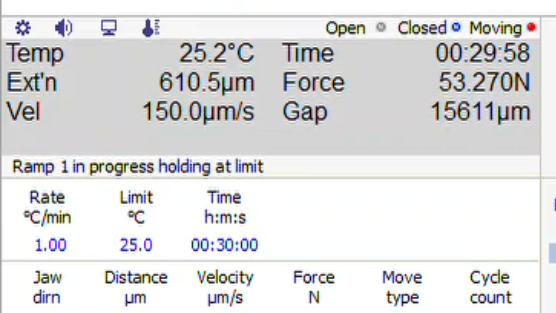
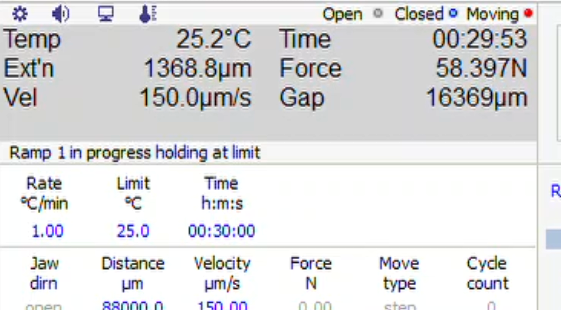
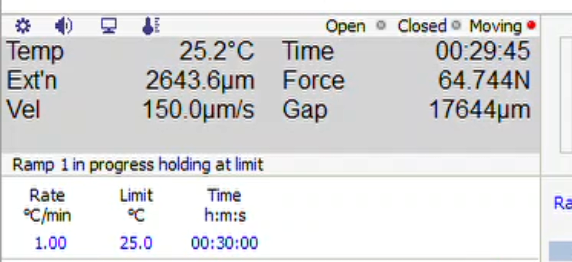

mmt-pva length is unknown. strain values cannot be calculated

the stages are quite diffiuclt to discen because the cracks appears quickly and thne dont really ocntinue to expand. its not easy 